# Customer Segementation project using RFM analysis

### This notebook contains online retail history transaction clean data from e-commerce platform
The goal of this project is to segment the customers into distinct groups of individuals that have similar characteristics

#### Part 1 : Query the Cleaned data 
- Explore online_transction_cleaned data
- Data extraction 
- Connecting to Redshift
#### Part 2 : Showcase SQL skills & Data Viz
- Exploratory analysis using SQL query
#### Part 3 : RFM analysis
- RFM analysis
- Derviation of RFM score
- Customer Segementation using RFM score
- Value segment & Viz
- Describe RFM customer segment
#### Part 4 : RFM value analyis Data Visualization
- Data Visualization using barplot
- Plotly treemap RFM segment analysis
- Heatmap
- Piechart
- Co-relation matrix
- Plotly go bar chart comparison customer segment with RFM score


In [1]:
# Import libraries
import os
import sys

import psycopg2
import pandas as pd
import numpy as np
from dotenv import load_dotenv
load_dotenv()  # To read the variables from .env file

# To import the definiations from python scripts from src folder
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.extract import extract_transactional_data

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

# To remove warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# To read variables from .env file
dbname= os.getenv('dbname')
host=os.getenv('host')
port=os.getenv('port')
user=os.getenv('user')
password=os.getenv('password')

In [3]:
# Redshift connection
def connect_to_redshift(dbname, host, port, user, password):
    """Method that connects to redshift. This gives a warning so will look for another solution"""

    connect = psycopg2.connect(
        dbname=dbname, host=host, port=port, user=user, password=password
    )
    print("connection to redshift made")

    return connect

In [4]:
connect = psycopg2.connect(dbname=dbname, host=host, port=port, user=user,password=password)

In [5]:
online_transactions_cleaned =extract_transactional_data(dbname, host, port, user, password)

connection to redshift made


In [6]:
online_transactions_cleaned.shape

(399841, 9)

In [7]:
online_transactions_cleaned.columns

Index(['invoice', 'stock_code', 'description', 'price', 'quantity',
       'total_order_value', 'invoice_date', 'customer_id', 'country'],
      dtype='object')

In [8]:
online_transactions_cleaned.head(10)

invoice stock_code                        description  price  quantity  \
0  536381     37444A    YELLOW BREAKFAST CUP AND SAUCER   2.95         1   
1  536384      22189            CREAM HEART CARD HOLDER   3.95         4   
2  536390      22960           JAM MAKING SET WITH JARS   3.75        12   
3  536392      21891   TRADITIONAL WOODEN SKIPPING ROPE   1.25        12   
4  536396     82494L        WOODEN FRAME ANTIQUE WHITE    2.55        12   
5  536401      22068        BLACK PIRATE TREASURE CHEST   1.65         2   
6  536409      21811  CHRISTMAS HANGING HEART WITH BELL   1.25         1   
7  536412      22961             JAM MAKING SET PRINTED   1.45        24   
8  536415      22470              HEART OF WICKER LARGE   2.95         1   
9  536420      21889             WOODEN BOX OF DOMINOES   1.25        12   

   total_order_value        invoice_date customer_id         country  
0               2.95 2010-12-01 09:41:00      u15311  United Kingdom  
1              15.80 2010-12-01 09:53:00      u18074  United Kingdom  
2              45.00 2010-12-01 10:19:00      u17511  United Kingdom  
3              15.00 2010-12-01 10:29:00      u13705  United Kingdom  
4              30.60 2010-12-01 10:51:00       u1785  United Kingdom  
5               3.30 2010-12-01 11:21:00      u15862  United Kingdom  
6               1.25 2010-12-01 11:45:00      u17908  United Kingdom  
7              34.80 2010-12-01 11:49:00       u1792  United Kingdom  
8               2.95 2010-12-01 11:57:00      u12838  United Kingdom  
9              15.00 2010-12-01 12:03:00      u16583  United Kingdom

# Exploratory analysis using SQL & Data Viz


-  What are the top ten most popular geographical locations?

In [9]:
# Extract SQL query to find out which country is most pouplar in spending 

query='''
select country,
       count(distinct customer_id) as customer_count
from bootcamp.online_transactions_cleaned
group by country
order by customer_count desc
limit 10;
'''
pd.read_sql(query,connect)

country  customer_count
0  United Kingdom            3943
1         Germany              95
2          France              87
3           Spain              30
4         Belgium              25
5     Switzerland              21
6        Portugal              19
7           Italy              14
8         Finland              12
9         Austria              11

##### Number of customer who spend mostly are from UnitedKingdom

In [10]:
# To plot Top 10 countries 
online_transactions_cleaned.country.value_counts().head(10)
# Assigned variable
geo_location= online_transactions_cleaned.country.value_counts().head(10)
geo_location

country
United Kingdom    356158
Germany             9081
France              8154
EIRE                7469
Spain               2463
Netherlands         2330
Belgium             1971
Switzerland         1844
Portugal            1427
Australia           1256
Name: count, dtype: int64

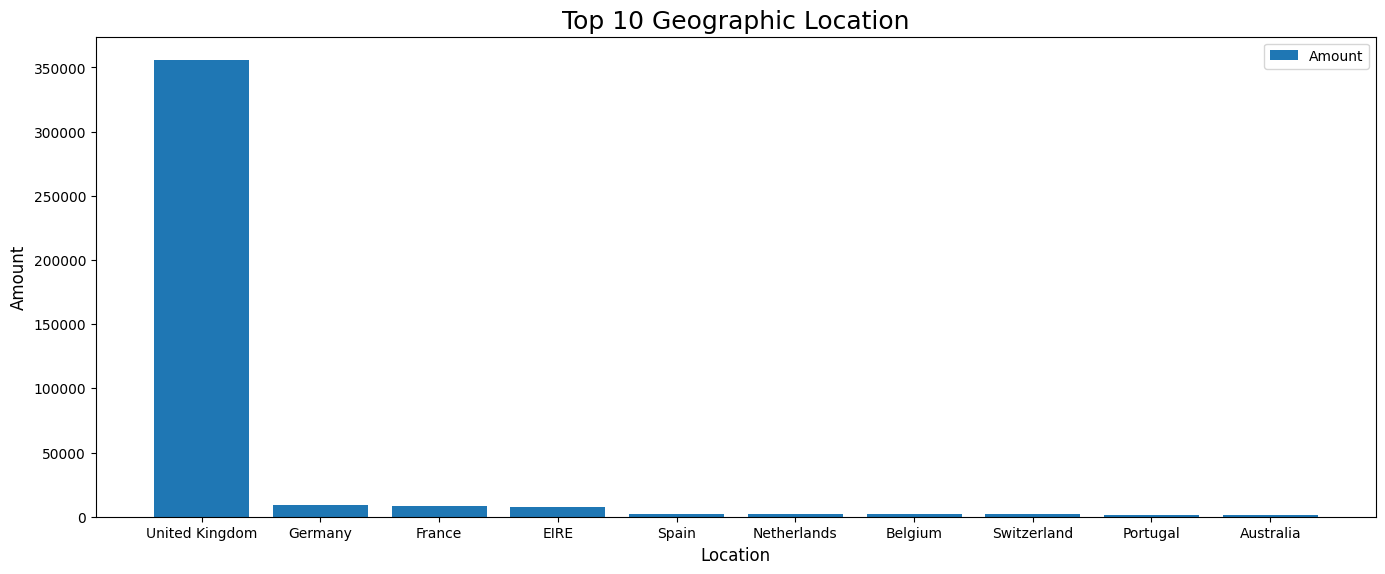

In [11]:
# Visualize plot the top 10 geopgraphic locations
# Import required visualization libraries
# Assigned variable name
top_10_geographic_location= geo_location.sort_values(ascending = False).head(10)

fig = plt.figure()
ax = fig.add_axes([0,0,2,1]) # [x0, y0, width, height] -> Change width & height 
ax.bar(top_10_geographic_location.index, top_10_geographic_location)

#ADD LEGEND
ax.legend(labels=['Amount'])

# ADDED LABELS
ax.set_title('Top 10 Geographic Location', fontweight ='medium', fontsize = 18)
ax.set_ylabel('Amount', fontsize = 12)
ax.set_xlabel('Location', fontsize = 12)

fig.show()

- Which country spends the most (you can look at price, quantity or order value i.e. price * quantity)?

In [12]:
# SQL query to understnad which country spends most looking at average spending 
query='''
select country,
       customer_id,
       avg(total_order_value) as average_spending
from bootcamp.online_transactions_cleaned
group by country,customer_id
order by average_spending desc
limit 5;
'''
pd.read_sql(query,connect)

country customer_id  average_spending
0  United Kingdom      u15098       9904.875000
1  United Kingdom      u15195       3861.000000
2  United Kingdom      u13135       3096.000000
3  United Kingdom      u16532       1687.200000
4  United Kingdom      u15749       1435.726667

In [13]:
# To find customers from which country spends more 
# Used group by 
customer_spend=online_transactions_cleaned.groupby(['customer_id','country'])['total_order_value'].mean().sort_values(ascending=False).reset_index(name='avg_spend')
customer_spend.head()

customer_id         country    avg_spend
0      u15098  United Kingdom  9904.875000
1      u15195  United Kingdom  3861.000000
2      u13135  United Kingdom  3096.000000
3      u16532  United Kingdom  1687.200000
4      u15749  United Kingdom  1435.726667

##### Customers from United kingdom spends more as per sales total order value

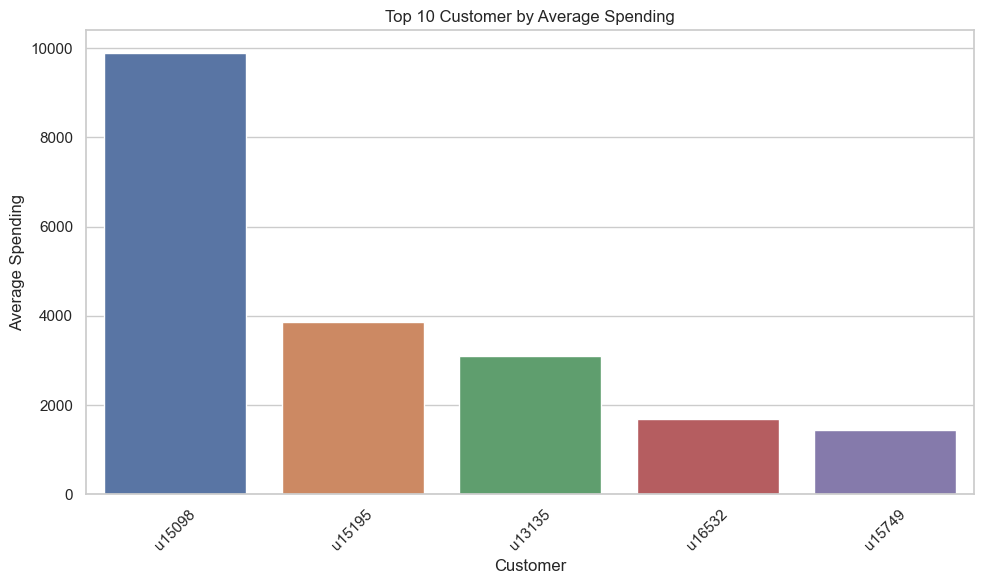

In [14]:
# Plot the bar
# To set the style for the plot 
sns.set(style="whitegrid")

# Create Barplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
barplot = sns.barplot(x='customer_id', y='avg_spend', data=customer_spend.head())

# Set plot labels and title
plt.xlabel('Customer')
plt.ylabel('Average Spending')
plt.title('Top 10 Customer by Average Spending')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the 
plt.tight_layout()
plt.show()

##### Distribution of Invoices as per month,year and day
- Visualize the distribution of Invoices per month?
- Which month has the highest number of transactions?
- Which day of the week has the highest number of transactions?

In [15]:
# SQL query
query='''
select extract (month from invoice_date) as month, 
       count(distinct invoice) as invoice_count
from bootcamp.online_transactions_cleaned
where extract (year from invoice_date) = 2011
group by month
order by 2 desc;
'''
pd.read_sql(query,connect)

month  invoice_count
0      11           3034
1      10           2208
2       9           2038
3       5           1808
4       6           1686
5       3           1588
6       7           1555
7       8           1506
8       4           1358
9       1           1225
10      2           1181
11     12            912

In [16]:
# To Analyze invoices per month
# Invoice month using datetime function on invoice_date
online_transactions_cleaned['invoice_month']= online_transactions_cleaned['invoice_date'].dt.month
online_transactions_cleaned

invoice stock_code                       description  price  quantity  \
0       536381     37444A   YELLOW BREAKFAST CUP AND SAUCER   2.95         1   
1       536384      22189           CREAM HEART CARD HOLDER   3.95         4   
2       536390      22960          JAM MAKING SET WITH JARS   3.75        12   
3       536392      21891  TRADITIONAL WOODEN SKIPPING ROPE   1.25        12   
4       536396     82494L       WOODEN FRAME ANTIQUE WHITE    2.55        12   
...        ...        ...                               ...    ...       ...   
399836  581495     15056N         EDWARDIAN PARASOL NATURAL   5.95        36   
399837  581502      23103      JINGLE BELL HEART DECORATION   1.65         8   
399838  581538      21328            BALLOONS  WRITING SET    1.65         1   
399839  581574      21258        VICTORIAN SEWING BOX LARGE  12.75         2   
399840  581580      22721     SET OF 3 CAKE TINS SKETCHBOOK   1.95         1   

        total_order_value        invoice_date customer_id         country  \
0                    2.95 2010-12-01 09:41:00      u15311  United Kingdom   
1                   15.80 2010-12-01 09:53:00      u18074  United Kingdom   
2                   45.00 2010-12-01 10:19:00      u17511  United Kingdom   
3                   15.00 2010-12-01 10:29:00      u13705  United Kingdom   
4                   30.60 2010-12-01 10:51:00       u1785  United Kingdom   
...                   ...                 ...         ...             ...   
399836             214.20 2011-12-09 10:20:00      u14051  United Kingdom   
399837              13.20 2011-12-09 10:51:00       u1591  United Kingdom   
399838               1.65 2011-12-09 11:34:00      u14446  United Kingdom   
399839              25.50 2011-12-09 12:09:00      u12526         Germany   
399840               1.95 2011-12-09 12:20:00      u12748  United Kingdom   

        invoice_month  
0                  12  
1                  12  
2                  12  
3                  12  
4                  12  
...               ...  
399836             12  
399837             12  
399838             12  
399839             12  
399840             12  

[399841 rows x 10 columns]

In [17]:
# Invoices made per month distribution
monthly_distribution =online_transactions_cleaned.groupby('invoice')['invoice_month'].value_counts().sort_values(ascending=False).reset_index(name= 'Invoice per month')
monthly_distribution.head()

invoice  invoice_month  Invoice per month
0  576339             11                542
1  579196             11                533
2  580727             12                529
3  578270             11                442
4  573576             10                435

In [18]:
# To extract Monthly highest transaction
# Group by invoice month 
Highest_transaction=online_transactions_cleaned.groupby('invoice')['invoice_month'].value_counts().sort_values(ascending=False).reset_index(name= 'high_trans_per mth')
Highest_transaction.head()

invoice  invoice_month  high_trans_per mth
0  576339             11                 542
1  579196             11                 533
2  580727             12                 529
3  578270             11                 442
4  573576             10                 435

In [19]:
# Extract invoice year 
online_transactions_cleaned['invoice_year']= online_transactions_cleaned['invoice_date'].dt.year
online_transactions_cleaned.head()

invoice stock_code                       description  price  quantity  \
0  536381     37444A   YELLOW BREAKFAST CUP AND SAUCER   2.95         1   
1  536384      22189           CREAM HEART CARD HOLDER   3.95         4   
2  536390      22960          JAM MAKING SET WITH JARS   3.75        12   
3  536392      21891  TRADITIONAL WOODEN SKIPPING ROPE   1.25        12   
4  536396     82494L       WOODEN FRAME ANTIQUE WHITE    2.55        12   

   total_order_value        invoice_date customer_id         country  \
0               2.95 2010-12-01 09:41:00      u15311  United Kingdom   
1              15.80 2010-12-01 09:53:00      u18074  United Kingdom   
2              45.00 2010-12-01 10:19:00      u17511  United Kingdom   
3              15.00 2010-12-01 10:29:00      u13705  United Kingdom   
4              30.60 2010-12-01 10:51:00       u1785  United Kingdom   

   invoice_month  invoice_year  
0             12          2010  
1             12          2010  
2             12          2010  
3             12          2010  
4             12          2010

In [20]:
# Extract day of week
online_transactions_cleaned['dow']= online_transactions_cleaned['invoice_date'].dt.day
online_transactions_cleaned

invoice stock_code                       description  price  quantity  \
0       536381     37444A   YELLOW BREAKFAST CUP AND SAUCER   2.95         1   
1       536384      22189           CREAM HEART CARD HOLDER   3.95         4   
2       536390      22960          JAM MAKING SET WITH JARS   3.75        12   
3       536392      21891  TRADITIONAL WOODEN SKIPPING ROPE   1.25        12   
4       536396     82494L       WOODEN FRAME ANTIQUE WHITE    2.55        12   
...        ...        ...                               ...    ...       ...   
399836  581495     15056N         EDWARDIAN PARASOL NATURAL   5.95        36   
399837  581502      23103      JINGLE BELL HEART DECORATION   1.65         8   
399838  581538      21328            BALLOONS  WRITING SET    1.65         1   
399839  581574      21258        VICTORIAN SEWING BOX LARGE  12.75         2   
399840  581580      22721     SET OF 3 CAKE TINS SKETCHBOOK   1.95         1   

        total_order_value        invoice_date customer_id         country  \
0                    2.95 2010-12-01 09:41:00      u15311  United Kingdom   
1                   15.80 2010-12-01 09:53:00      u18074  United Kingdom   
2                   45.00 2010-12-01 10:19:00      u17511  United Kingdom   
3                   15.00 2010-12-01 10:29:00      u13705  United Kingdom   
4                   30.60 2010-12-01 10:51:00       u1785  United Kingdom   
...                   ...                 ...         ...             ...   
399836             214.20 2011-12-09 10:20:00      u14051  United Kingdom   
399837              13.20 2011-12-09 10:51:00       u1591  United Kingdom   
399838               1.65 2011-12-09 11:34:00      u14446  United Kingdom   
399839              25.50 2011-12-09 12:09:00      u12526         Germany   
399840               1.95 2011-12-09 12:20:00      u12748  United Kingdom   

        invoice_month  invoice_year  dow  
0                  12          2010    1  
1                  12          2010    1  
2                  12          2010    1  
3                  12          2010    1  
4                  12          2010    1  
...               ...           ...  ...  
399836             12          2011    9  
399837             12          2011    9  
399838             12          2011    9  
399839             12          2011    9  
399840             12          2011    9  

[399841 rows x 12 columns]

In [21]:
# SQl query to understand which day makes maximum transactions in year 2011 
query='''
select extract (DOW from invoice_date) as day_of_week, 
       count(distinct invoice) as transaction_count
from bootcamp.online_transactions_cleaned
where extract(year from invoice_date) = 2011
group by day_of_week
order by  transaction_count desc
limit 1;
'''
pd.read_sql(query,connect)

day_of_week  transaction_count
0            4               4430

In [22]:
query='''
select extract (DOW from invoice_date) as day_of_week, 
       count(distinct invoice) as transaction_count
from bootcamp.online_transactions_cleaned
where extract(year from invoice_date) = 2010
group by day_of_week
order by  transaction_count desc
limit 1;
'''
pd.read_sql(query,connect)

day_of_week  transaction_count
0            4                458

### 4th DOW has made maximum transactions

In [23]:
# To find out customer_id & country alonwith invoices spend most DOW transaction in year
# Flitering years where invocie.year = 2011
online_transactions_cleaned.groupby(['customer_id','invoice','country'])['invoice_year'].value_counts().sort_values(ascending=False).reset_index(name='dow_spend')

customer_id  invoice         country  invoice_year  dow_spend
0          u14096   576339  United Kingdom          2011        542
1          u14096   579196  United Kingdom          2011        533
2          u14096   580727  United Kingdom          2011        529
3          u14096   578270  United Kingdom          2011        442
4          u14096   573576  United Kingdom          2011        435
...           ...      ...             ...           ...        ...
21786        u148  C570553  United Kingdom          2011          1
21787        u148  C551648  United Kingdom          2011          1
21788        u148   570554  United Kingdom          2011          1
21789        u148   551651  United Kingdom          2011          1
21790      u12346   541431  United Kingdom          2011          1

[21791 rows x 5 columns]

In [24]:
online_transactions_cleaned.columns

Index(['invoice', 'stock_code', 'description', 'price', 'quantity',
       'total_order_value', 'invoice_date', 'customer_id', 'country',
       'invoice_month', 'invoice_year', 'dow'],
      dtype='object')

In [25]:
# To crosscheck invoice = 579196 has made 533 transactions in year 2011
online_transactions_cleaned[(online_transactions_cleaned.invoice == "579196")]

invoice stock_code                         description  price  \
247680  579196      22115               METAL SIGN EMPIRE TEA   5.79   
247681  579196      22411   JUMBO SHOPPER VINTAGE RED PAISLEY   4.13   
247682  579196      22731       3D CHRISTMAS STAMPS STICKERS    2.46   
247683  579196      23145      ZINC T-LIGHT HOLDER STAR LARGE   2.08   
247684  579196     47504H          ENGLISH ROSE SPIRIT LEVEL    3.29   
...        ...        ...                                 ...    ...   
398951  579196      22951     60 CAKE CASES DOLLY GIRL DESIGN   1.25   
398952  579196      23283      DOORMAT VINTAGE LEAVES DESIGN   15.79   
398953  579196     85039A  SET/4 RED MINI ROSE CANDLE IN BOWL   1.63   
398954  579196      20659                 ECONOMY LUGGAGE TAG   2.46   
398955  579196      21147        JINGLE BELLS TREE DECORATION   2.46   

        quantity  total_order_value        invoice_date customer_id  \
247680         2              11.58 2011-11-28 15:54:00      u14096   
247681         1               4.13 2011-11-28 15:54:00      u14096   
247682         1               2.46 2011-11-28 15:54:00      u14096   
247683         3               6.24 2011-11-28 15:54:00      u14096   
247684         2               6.58 2011-11-28 15:54:00      u14096   
...          ...                ...                 ...         ...   
398951         2               2.50 2011-11-28 15:54:00      u14096   
398952         2              31.58 2011-11-28 15:54:00      u14096   
398953         6               9.78 2011-11-28 15:54:00      u14096   
398954         1               2.46 2011-11-28 15:54:00      u14096   
398955         7              17.22 2011-11-28 15:54:00      u14096   

               country  invoice_month  invoice_year  dow  
247680  United Kingdom             11          2011   28  
247681  United Kingdom             11          2011   28  
247682  United Kingdom             11          2011   28  
247683  United Kingdom             11          2011   28  
247684  United Kingdom             11          2011   28  
...                ...            ...           ...  ...  
398951  United Kingdom             11          2011   28  
398952  United Kingdom             11          2011   28  
398953  United Kingdom             11          2011   28  
398954  United Kingdom             11          2011   28  
398955  United Kingdom             11          2011   28  

[533 rows x 12 columns]

##### Which customers could be considered high profile customers?
- Calculate an order value field, this is the price * quantity. Identify customers that have spent more than the average user.
- Which customers have purchased the most (look at the frequency of orders)?
- Can you say anything about customers that purchased recently?


In [26]:
# Customers with Most Purchases
most_purchases_customers = online_transactions_cleaned.groupby(['customer_id','country'])['invoice'].nunique().nlargest(10)
most_purchases_customers

customer_id  country       
u14911       EIRE              243
u12748       United Kingdom    217
u17841       United Kingdom    169
u14606       United Kingdom    125
u13089       United Kingdom    118
u15311       United Kingdom    118
u12971       United Kingdom     88
u13408       United Kingdom     75
u14646       Netherlands        74
u16029       United Kingdom     66
Name: invoice, dtype: int64

In [27]:
online_transactions_cleaned.describe()

price       quantity  total_order_value  \
count  399841.000000  399841.000000      399841.000000   
mean        2.952914      12.224359          20.716904   
min         0.000000  -80995.000000     -168469.600000   
25%         1.250000       2.000000           4.250000   
50%         1.950000       5.000000          11.580000   
75%         3.750000      12.000000          19.500000   
max      1599.260000   80995.000000      168469.600000   
std         7.317593     250.788860         425.471765   

                        invoice_date  invoice_month   invoice_year  \
count                         399841  399841.000000  399841.000000   
mean   2011-07-10 12:40:36.644566272       7.596427    2010.934356   
min              2010-12-01 08:26:00       1.000000    2010.000000   
25%              2011-04-06 15:31:00       5.000000    2011.000000   
50%              2011-07-29 15:59:00       8.000000    2011.000000   
75%              2011-10-20 12:03:00      11.000000    2011.000000   
max              2011-12-09 12:50:00      12.000000    2011.000000   
std                              NaN       3.417386       0.247658   

                 dow  
count  399841.000000  
mean       15.037720  
min         1.000000  
25%         7.000000  
50%        15.000000  
75%        22.000000  
max        31.000000  
std         8.652579

In [28]:
# To find out stock_code 20719 has been mostly purchased
online_transactions_cleaned[(online_transactions_cleaned.stock_code == "20719")]

invoice stock_code             description  price  quantity  \
1290    536783      20719  WOODLAND CHARLOTTE BAG   0.72       100   
1586    537201      20719  WOODLAND CHARLOTTE BAG   0.85        30   
1726    537212      20719  WOODLAND CHARLOTTE BAG   0.85        10   
2645    536796      20719  WOODLAND CHARLOTTE BAG   0.85         1   
4235    536984      20719  WOODLAND CHARLOTTE BAG   0.85         5   
...        ...        ...                     ...    ...       ...   
399042  579559      20719  WOODLAND CHARLOTTE BAG   0.85         2   
399061  579840      20719  WOODLAND CHARLOTTE BAG   0.85        10   
399448  580778      20719  WOODLAND CHARLOTTE BAG   0.85        10   
399492  580981      20719  WOODLAND CHARLOTTE BAG   0.85        10   
399550  581180      20719  WOODLAND CHARLOTTE BAG   0.85        10   

        total_order_value        invoice_date customer_id         country  \
1290                72.00 2010-12-02 15:19:00      u15061  United Kingdom   
1586                25.50 2010-12-05 14:19:00      u12472         Germany   
1726                 8.50 2010-12-05 15:21:00       u1272         Germany   
2645                 0.85 2010-12-02 15:46:00      u15574  United Kingdom   
4235                 4.25 2010-12-03 14:35:00      u17841  United Kingdom   
...                   ...                 ...         ...             ...   
399042               1.70 2011-11-30 11:30:00      u16764  United Kingdom   
399061               8.50 2011-11-30 16:19:00      u18158  United Kingdom   
399448               8.50 2011-12-06 11:07:00      u16949  United Kingdom   
399492               8.50 2011-12-06 16:02:00      u16201  United Kingdom   
399550               8.50 2011-12-07 15:52:00      u12347         Iceland   

        invoice_month  invoice_year  dow  
1290               12          2010    2  
1586               12          2010    5  
1726               12          2010    5  
2645               12          2010    2  
4235               12          2010    3  
...               ...           ...  ...  
399042             11          2011   30  
399061             11          2011   30  
399448             12          2011    6  
399492             12          2011    6  
399550             12          2011    7  

[546 rows x 12 columns]

In [29]:
# To check quantity in negative 
# C in invoice column we can assume same as cancelled invoices
online_transactions_cleaned[(online_transactions_cleaned.quantity < 0)].head(10)

invoice stock_code                       description  price  quantity  \
68   C536548      22631          CIRCUS PARADE LUNCH BOX    1.95        -1   
121  C536548      22580      ADVENT CALENDAR GINGHAM SACK   5.95        -4   
201  C536391      22557  PLASTERS IN TIN VINTAGE PAISLEY    1.65       -12   
345  C536820      22878                           Unknown   2.10        -1   
367  C536548      21218            RED SPOTTY BISCUIT TIN   3.75        -3   
477  C536850      22942       CHRISTMAS LIGHTS 10 SANTAS    7.65       -48   
564  C536391      21984  PACK OF 12 PINK PAISLEY TISSUES    0.29       -24   
684  C536548      22242     5 HOOK HANGER MAGIC TOADSTOOL   1.65        -5   
835  C536807      22501        PICNIC BASKET WICKER LARGE   9.95        -2   
869  C536812      22595           CHRISTMAS GINGHAM HEART   0.72      -144   

     total_order_value        invoice_date customer_id         country  \
68               -1.95 2010-12-01 14:33:00      u12472         Germany   
121             -23.80 2010-12-01 14:33:00      u12472         Germany   
201             -19.80 2010-12-01 10:24:00      u17548  United Kingdom   
345              -2.10 2010-12-02 17:14:00      u18168  United Kingdom   
367             -11.25 2010-12-01 14:33:00      u12472         Germany   
477            -367.20 2010-12-03 09:47:00      u14213  United Kingdom   
564              -6.96 2010-12-01 10:24:00      u17548  United Kingdom   
684              -8.25 2010-12-01 14:33:00      u12472         Germany   
835             -19.90 2010-12-02 16:45:00      u15834  United Kingdom   
869            -103.68 2010-12-02 16:58:00      u16546  United Kingdom   

     invoice_month  invoice_year  dow  
68              12          2010    1  
121             12          2010    1  
201             12          2010    1  
345             12          2010    2  
367             12          2010    1  
477             12          2010    3  
564             12          2010    1  
684             12          2010    1  
835             12          2010    2  
869             12          2010    2

In [30]:
# To crosscheck customer_id = u1368 made how many transactions made by him and cancelled
online_transactions_cleaned[(online_transactions_cleaned.customer_id == "u1368")]

invoice stock_code                          description  price  \
7254     540033      22649         STRAWBERRY FAIRY CAKE TEAPOT   4.95   
8041     540033     84970S    HANGING HEART ZINC T-LIGHT HOLDER   0.85   
8450     540275      20727              LUNCH BAG  BLACK SKULL.   1.65   
8670    C540417      20727              LUNCH BAG  BLACK SKULL.   1.65   
10292    540033      21155                RED RETROSPOT PEG BAG   2.10   
...         ...        ...                                  ...    ...   
396881   581404      22936    BAKING MOULD ROSE WHITE CHOCOLATE   3.25   
399519   581404      20963                    APPLE BATH SPONGE   1.25   
399520   581404      22632            HAND WARMER RED POLKA DOT   2.10   
399597   581404      21755             LOVE BUILDING BLOCK WORD   6.25   
399809   581404      22645  CERAMIC HEART FAIRY CAKE MONEY BANK   0.39   

        quantity  total_order_value        invoice_date customer_id  \
7254           1               4.95 2011-01-04 14:12:00       u1368   
8041          12              10.20 2011-01-04 14:12:00       u1368   
8450          30              49.50 2011-01-06 12:11:00       u1368   
8670         -30             -49.50 2011-01-07 10:56:00       u1368   
10292          4               8.40 2011-01-04 14:12:00       u1368   
...          ...                ...                 ...         ...   
396881         4              13.00 2011-12-08 13:47:00       u1368   
399519        10              12.50 2011-12-08 13:47:00       u1368   
399520        13              27.30 2011-12-08 13:47:00       u1368   
399597         2              12.50 2011-12-08 13:47:00       u1368   
399809         4               1.56 2011-12-08 13:47:00       u1368   

               country  invoice_month  invoice_year  dow  
7254    United Kingdom              1          2011    4  
8041    United Kingdom              1          2011    4  
8450    United Kingdom              1          2011    6  
8670    United Kingdom              1          2011    7  
10292   United Kingdom              1          2011    4  
...                ...            ...           ...  ...  
396881  United Kingdom             12          2011    8  
399519  United Kingdom             12          2011    8  
399520  United Kingdom             12          2011    8  
399597  United Kingdom             12          2011    8  
399809  United Kingdom             12          2011    8  

[215 rows x 12 columns]

In [31]:
# Customers who Purchased Recently
recent_purchases_customers = online_transactions_cleaned.groupby(['customer_id','country'])['invoice_date'].max().nlargest(10)
recent_purchases_customers

customer_id  country       
u1268        France           2011-12-09 12:50:00
u13113       United Kingdom   2011-12-09 12:49:00
u15804       United Kingdom   2011-12-09 12:31:00
u13777       United Kingdom   2011-12-09 12:25:00
u17581       United Kingdom   2011-12-09 12:21:00
u12748       United Kingdom   2011-12-09 12:20:00
u12713       Germany          2011-12-09 12:16:00
u12526       Germany          2011-12-09 12:09:00
u16705       United Kingdom   2011-12-09 12:08:00
u15311       United Kingdom   2011-12-09 12:00:00
Name: invoice_date, dtype: datetime64[ns]

In [32]:
# Customers with Least Spending
# Using groupby 
lowest_spending_customers = online_transactions_cleaned.groupby(['customer_id','country'])['total_order_value'].min().nsmallest(10)
lowest_spending_customers

customer_id  country       
u16446       United Kingdom   -168469.60
u12346       United Kingdom    -77183.60
u15749       United Kingdom     -6539.40
u1745        United Kingdom     -3825.36
u12931       United Kingdom     -2432.70
u16029       United Kingdom     -1836.00
u17949       United Kingdom     -1642.50
u12755       Japan              -1591.20
u14031       United Kingdom     -1416.00
u15769       United Kingdom     -1326.00
Name: total_order_value, dtype: float64

In [33]:
def extract_customer_data(dbname,host,port,user,password):
    # extracts data from redshift
    # querying the table online_transactions_cleaned from bootcamp data warehouse
    
    connect = connect_to_redshift(dbname, host, port, user, password)

    query = """
    select customer_id,
           country,
           description,
           stock_code,
           count(distinct invoice) as transaction_count,
           count(distinct stock_code) as product_count,
           max(invoice_date) as recent_purchase_made,
           round(avg(total_order_value),2) as avg_order_value
    from bootcamp.online_transactions_cleaned 
    where extract(year from invoice_date) = '2011' 
    group by customer_id,country,description,stock_code
    having avg_order_value > 0
    order by avg_order_value desc;
    """
    online_trans_cleaned =pd.read_sql(query,connect)
   

    return online_trans_cleaned

 



In [34]:
customer_data=extract_customer_data(dbname,host,port,user,password)
customer_data.info()

connection to redshift made
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250042 entries, 0 to 250041
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   customer_id           250042 non-null  object        
 1   country               250042 non-null  object        
 2   description           250042 non-null  object        
 3   stock_code            250042 non-null  object        
 4   transaction_count     250042 non-null  int64         
 5   product_count         250042 non-null  int64         
 6   recent_purchase_made  250042 non-null  datetime64[ns]
 7   avg_order_value       250042 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 15.3+ MB


In [35]:
type(customer_data)

pandas.core.frame.DataFrame

In [36]:
customer_data.shape

(250042, 8)

In [37]:
# Top 5 customers based on Avg order value
customer_data.head()

customer_id         country                      description stock_code  \
0      u15098  United Kingdom       PICNIC BASKET WICKER SMALL      22502   
1      u15195  United Kingdom  METAL SIGN TAKE IT OR LEAVE IT       22413   
2      u17949  United Kingdom            REGENCY TEAPOT ROSES       23173   
3      u18102  United Kingdom     LANDMARK FRAME OXFORD STREET      23554   
4      u18102  United Kingdom    LANDMARK FRAME LONDON BRIDGE       23558   

   transaction_count  product_count recent_purchase_made  avg_order_value  
0                  4              1  2011-06-10 15:39:00          9904.88  
1                  1              1  2011-12-07 12:20:00          3861.00  
2                  2              1  2011-07-28 14:33:00          3765.30  
3                  1              1  2011-10-21 12:08:00          3285.00  
4                  1              1  2011-10-21 12:08:00          3285.00

In [38]:
# Least 5 customers based on Avg order value
customer_data.tail()

customer_id         country                      description  \
250037      u14593  United Kingdom  TEATIME ROUND PENCIL SHARPENER    
250038      u14104  United Kingdom   PORCELAIN BUDAH INCENSE HOLDER   
250039       u1592  United Kingdom   PORCELAIN BUDAH INCENSE HOLDER   
250040      u15858  United Kingdom   PORCELAIN BUDAH INCENSE HOLDER   
250041      u14866  United Kingdom      PAPER POCKET TRAVELING FAN    

       stock_code  transaction_count  product_count recent_purchase_made  \
250037      16048                  1              1  2011-11-18 12:48:00   
250038      17038                  1              1  2011-06-27 12:49:00   
250039      17038                  1              1  2011-07-08 15:25:00   
250040      17038                  1              1  2011-11-24 12:48:00   
250041      15034                  3              1  2011-09-27 11:08:00   

        avg_order_value  
250037             0.12  
250038             0.10  
250039             0.10  
250040             0.10  
250041             0.05

In [39]:
customer_data.columns

Index(['customer_id', 'country', 'description', 'stock_code',
       'transaction_count', 'product_count', 'recent_purchase_made',
       'avg_order_value'],
      dtype='object')

## RFM Analaysis

Recency-Frequency-Monetary (RFM) analysis is a indexing technique that uses past purchase behavior to segment customers into groups

- Recency: How recently have they made a purchase?- 
Frequency: How often have they bought something
- 
Monetary Value: How much money do they spend on average when making purchases?

In [40]:
# Recency to check last purchase made by customer 
# Added recency column to find out total number of days last purchase made
customer_data["recency"]=round((customer_data['recent_purchase_made'].max() - customer_data['recent_purchase_made']) / np.timedelta64(1, 'D'),0)

In [41]:
customer_data.head()

customer_id         country                      description stock_code  \
0      u15098  United Kingdom       PICNIC BASKET WICKER SMALL      22502   
1      u15195  United Kingdom  METAL SIGN TAKE IT OR LEAVE IT       22413   
2      u17949  United Kingdom            REGENCY TEAPOT ROSES       23173   
3      u18102  United Kingdom     LANDMARK FRAME OXFORD STREET      23554   
4      u18102  United Kingdom    LANDMARK FRAME LONDON BRIDGE       23558   

   transaction_count  product_count recent_purchase_made  avg_order_value  \
0                  4              1  2011-06-10 15:39:00          9904.88   
1                  1              1  2011-12-07 12:20:00          3861.00   
2                  2              1  2011-07-28 14:33:00          3765.30   
3                  1              1  2011-10-21 12:08:00          3285.00   
4                  1              1  2011-10-21 12:08:00          3285.00   

   recency  
0    182.0  
1      2.0  
2    134.0  
3     49.0  
4     49.0

In [42]:
# Calculate frequency how often customer has bought prodcuts
frequency_data = customer_data.groupby('customer_id')['stock_code'].count().reset_index()

# Rename the colum stock_code as frequency
frequency_data.rename(columns={'stock_code': 'frequency'}, inplace=True)

# Merge with customer_data Join left
customer_freq_data =customer_data.merge(frequency_data, on='customer_id', how='left')

In [43]:
customer_freq_data.head()

customer_id         country                      description stock_code  \
0      u15098  United Kingdom       PICNIC BASKET WICKER SMALL      22502   
1      u15195  United Kingdom  METAL SIGN TAKE IT OR LEAVE IT       22413   
2      u17949  United Kingdom            REGENCY TEAPOT ROSES       23173   
3      u18102  United Kingdom     LANDMARK FRAME OXFORD STREET      23554   
4      u18102  United Kingdom    LANDMARK FRAME LONDON BRIDGE       23558   

   transaction_count  product_count recent_purchase_made  avg_order_value  \
0                  4              1  2011-06-10 15:39:00          9904.88   
1                  1              1  2011-12-07 12:20:00          3861.00   
2                  2              1  2011-07-28 14:33:00          3765.30   
3                  1              1  2011-10-21 12:08:00          3285.00   
4                  1              1  2011-10-21 12:08:00          3285.00   

   recency  frequency  
0    182.0          1  
1      2.0          1  
2    134.0         27  
3     49.0        145  
4     49.0        145

In [44]:
# Calculate Monetary Value
monetary_data = customer_data.groupby('customer_id')['avg_order_value'].sum().reset_index()

# Rename avg_order_value as Monetaryvalue
monetary_data.rename(columns={'avg_order_value': 'monetary_value'}, inplace=True)

# Merge left join with customer_data
customer_final_data = customer_freq_data.merge(monetary_data, on='customer_id', how='left')

In [45]:
customer_final_data.head()

customer_id         country                      description stock_code  \
0      u15098  United Kingdom       PICNIC BASKET WICKER SMALL      22502   
1      u15195  United Kingdom  METAL SIGN TAKE IT OR LEAVE IT       22413   
2      u17949  United Kingdom            REGENCY TEAPOT ROSES       23173   
3      u18102  United Kingdom     LANDMARK FRAME OXFORD STREET      23554   
4      u18102  United Kingdom    LANDMARK FRAME LONDON BRIDGE       23558   

   transaction_count  product_count recent_purchase_made  avg_order_value  \
0                  4              1  2011-06-10 15:39:00          9904.88   
1                  1              1  2011-12-07 12:20:00          3861.00   
2                  2              1  2011-07-28 14:33:00          3765.30   
3                  1              1  2011-10-21 12:08:00          3285.00   
4                  1              1  2011-10-21 12:08:00          3285.00   

   recency  frequency  monetary_value  
0    182.0          1         9904.88  
1      2.0          1         3861.00  
2    134.0         27        20098.88  
3     49.0        145        80559.18  
4     49.0        145        80559.18

In [46]:
customer_final_data.describe()

transaction_count  product_count           recent_purchase_made  \
count      250042.000000       250042.0                         250042   
mean            1.461314            1.0  2011-08-08 13:25:51.533262080   
min             1.000000            1.0            2011-01-04 10:00:00   
25%             1.000000            1.0            2011-05-18 15:26:00   
50%             1.000000            1.0            2011-09-09 15:09:00   
75%             1.000000            1.0            2011-11-04 12:45:00   
max            80.000000            1.0            2011-12-09 12:50:00   
std             1.332155            0.0                            NaN   

       avg_order_value        recency      frequency  monetary_value  
count    250042.000000  250042.000000  250042.000000   250042.000000  
mean         17.875109     122.991757     172.893298     2854.213633  
min           0.050000       0.000000       1.000000        2.900000  
25%           4.950000      35.000000      55.000000      642.810000  
50%          11.580000      91.000000     107.000000     1300.880000  
75%          17.850000     205.000000     200.000000     2311.150000  
max        9904.880000     339.000000    1705.000000    80633.460000  
std          51.437788      99.916924     238.624908     7334.414709

#### Derivation of RFM score
- Using pd.qcut pandas function helps us to segment and sort data values into 5 bins
- Converting datatype of recency,frequency and monetary_value into integer

In [47]:
# Define scoring criteria for each RFM value

recency_scores = [5, 4, 3, 2, 1]  #  5 to 1 Higher score for lower recency (most recent purchase made by customer)

frequency_scores = [1, 2, 3, 4, 5]  # 1 to 5 Higher score for higher frequency (customers who made more frequent purchases will receive higher frequencyscores)

monetary_scores = [1, 2, 3, 4, 5]  #  1 to 5 Higher score for higher monetary value (higher amount spent by the customer)




In [48]:
# Divided recency ,frequency,monetary_value into bins. Assigned 5 bins for each value and assigned the corresponding scores to each bin.
customer_final_data['rec_score'] = pd.qcut(customer_final_data['recency'],4,['4','3','2','1'])
customer_final_data['freq_score'] = pd.qcut(customer_final_data['frequency'], 4,['4','3','2','1'])
customer_final_data['mone_score'] = pd.qcut(customer_final_data['monetary_value'], 4,['4','3','2','1'])

rfm['r_score'] = pd.qcut(rfm['recency'], 5, ['5','4','3','2','1'])
rfm['f_score'] = pd.qcut(rfm['frequency'], 5, ['1','2','3','4','5'])
rfm['m_score'] = pd.qcut(rfm['monetary'], 5, ['1','2','3','4','5'])


In [49]:
customer_final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250042 entries, 0 to 250041
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   customer_id           250042 non-null  object        
 1   country               250042 non-null  object        
 2   description           250042 non-null  object        
 3   stock_code            250042 non-null  object        
 4   transaction_count     250042 non-null  int64         
 5   product_count         250042 non-null  int64         
 6   recent_purchase_made  250042 non-null  datetime64[ns]
 7   avg_order_value       250042 non-null  float64       
 8   recency               250042 non-null  float64       
 9   frequency             250042 non-null  int64         
 10  monetary_value        250042 non-null  float64       
 11  rec_score             250042 non-null  category      
 12  freq_score            250042 non-null  category      
 13 

In [50]:
# Convert RFM scores to numeric type
customer_final_data['rec_score'] = customer_final_data['rec_score'].astype(int)
customer_final_data['freq_score'] = customer_final_data['freq_score'].astype(int)
customer_final_data['mone_score'] = customer_final_data['mone_score'].astype(int)

In [51]:
customer_final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250042 entries, 0 to 250041
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   customer_id           250042 non-null  object        
 1   country               250042 non-null  object        
 2   description           250042 non-null  object        
 3   stock_code            250042 non-null  object        
 4   transaction_count     250042 non-null  int64         
 5   product_count         250042 non-null  int64         
 6   recent_purchase_made  250042 non-null  datetime64[ns]
 7   avg_order_value       250042 non-null  float64       
 8   recency               250042 non-null  float64       
 9   frequency             250042 non-null  int64         
 10  monetary_value        250042 non-null  float64       
 11  rec_score             250042 non-null  int32         
 12  freq_score            250042 non-null  int32         
 13 

In [52]:
customer_final_data.columns

Index(['customer_id', 'country', 'description', 'stock_code',
       'transaction_count', 'product_count', 'recent_purchase_made',
       'avg_order_value', 'recency', 'frequency', 'monetary_value',
       'rec_score', 'freq_score', 'mone_score'],
      dtype='object')

In [53]:
customer_final_data.head()

customer_id         country                      description stock_code  \
0      u15098  United Kingdom       PICNIC BASKET WICKER SMALL      22502   
1      u15195  United Kingdom  METAL SIGN TAKE IT OR LEAVE IT       22413   
2      u17949  United Kingdom            REGENCY TEAPOT ROSES       23173   
3      u18102  United Kingdom     LANDMARK FRAME OXFORD STREET      23554   
4      u18102  United Kingdom    LANDMARK FRAME LONDON BRIDGE       23558   

   transaction_count  product_count recent_purchase_made  avg_order_value  \
0                  4              1  2011-06-10 15:39:00          9904.88   
1                  1              1  2011-12-07 12:20:00          3861.00   
2                  2              1  2011-07-28 14:33:00          3765.30   
3                  1              1  2011-10-21 12:08:00          3285.00   
4                  1              1  2011-10-21 12:08:00          3285.00   

   recency  frequency  monetary_value  rec_score  freq_score  mone_score  
0    182.0          1         9904.88          2           4           1  
1      2.0          1         3861.00          4           4           1  
2    134.0         27        20098.88          2           4           1  
3     49.0        145        80559.18          3           2           1  
4     49.0        145        80559.18          3           2           1

#### Value Segmetation using RFM score 
- RFM score by Adding individual Receny,frequeny and Monetary scores
- Using pd-qcut function created segment labels assinged 3 bins as low-value, mid-value, high-value

In [54]:
# Calculate RFM Score 
customer_final_data['rfm_score'] = customer_final_data.rec_score + customer_final_data.freq_score + customer_final_data.mone_score

In [55]:
customer_final_data.head()

customer_id         country                      description stock_code  \
0      u15098  United Kingdom       PICNIC BASKET WICKER SMALL      22502   
1      u15195  United Kingdom  METAL SIGN TAKE IT OR LEAVE IT       22413   
2      u17949  United Kingdom            REGENCY TEAPOT ROSES       23173   
3      u18102  United Kingdom     LANDMARK FRAME OXFORD STREET      23554   
4      u18102  United Kingdom    LANDMARK FRAME LONDON BRIDGE       23558   

   transaction_count  product_count recent_purchase_made  avg_order_value  \
0                  4              1  2011-06-10 15:39:00          9904.88   
1                  1              1  2011-12-07 12:20:00          3861.00   
2                  2              1  2011-07-28 14:33:00          3765.30   
3                  1              1  2011-10-21 12:08:00          3285.00   
4                  1              1  2011-10-21 12:08:00          3285.00   

   recency  frequency  monetary_value  rec_score  freq_score  mone_score  \
0    182.0          1         9904.88          2           4           1   
1      2.0          1         3861.00          4           4           1   
2    134.0         27        20098.88          2           4           1   
3     49.0        145        80559.18          3           2           1   
4     49.0        145        80559.18          3           2           1   

   rfm_score  
0          7  
1          9  
2          7  
3          6  
4          6

In [56]:
customer_final_data.rfm_score.value_counts()

rfm_score
9     37004
6     36746
7     36617
8     32476
10    27221
5     25239
4     19462
11    18732
12     8616
3      7929
Name: count, dtype: int64

In [57]:
# Create RFM segments based on the RFM score using pd.qcut
# Assigned variable name as segment_labels
segment_labels = ['low-value', 'mid-value', 'high-value']
# Using pd.qcut created new column name value_segment 
customer_final_data['value_segment'] = pd.qcut(customer_final_data['rfm_score'], q=3, labels=segment_labels)

In [58]:
customer_final_data.head()

customer_id         country                      description stock_code  \
0      u15098  United Kingdom       PICNIC BASKET WICKER SMALL      22502   
1      u15195  United Kingdom  METAL SIGN TAKE IT OR LEAVE IT       22413   
2      u17949  United Kingdom            REGENCY TEAPOT ROSES       23173   
3      u18102  United Kingdom     LANDMARK FRAME OXFORD STREET      23554   
4      u18102  United Kingdom    LANDMARK FRAME LONDON BRIDGE       23558   

   transaction_count  product_count recent_purchase_made  avg_order_value  \
0                  4              1  2011-06-10 15:39:00          9904.88   
1                  1              1  2011-12-07 12:20:00          3861.00   
2                  2              1  2011-07-28 14:33:00          3765.30   
3                  1              1  2011-10-21 12:08:00          3285.00   
4                  1              1  2011-10-21 12:08:00          3285.00   

   recency  frequency  monetary_value  rec_score  freq_score  mone_score  \
0    182.0          1         9904.88          2           4           1   
1      2.0          1         3861.00          4           4           1   
2    134.0         27        20098.88          2           4           1   
3     49.0        145        80559.18          3           2           1   
4     49.0        145        80559.18          3           2           1   

   rfm_score value_segment  
0          7     mid-value  
1          9     mid-value  
2          7     mid-value  
3          6     low-value  
4          6     low-value

In [59]:
customer_final_data.value_segment.value_counts()

value_segment
mid-value     106097
low-value      89376
high-value     54569
Name: count, dtype: int64

In [60]:
customer_final_data.rfm_score.value_counts()

rfm_score
9     37004
6     36746
7     36617
8     32476
10    27221
5     25239
4     19462
11    18732
12     8616
3      7929
Name: count, dtype: int64

## Segment Distribution Viz

In [61]:
# Assinged varibale name as segment_counts to plot segmentation
segment_counts = customer_final_data['value_segment'].value_counts().reset_index()
# dataframe segment_counts 
segment_counts.columns = ['value_segment', 'count']

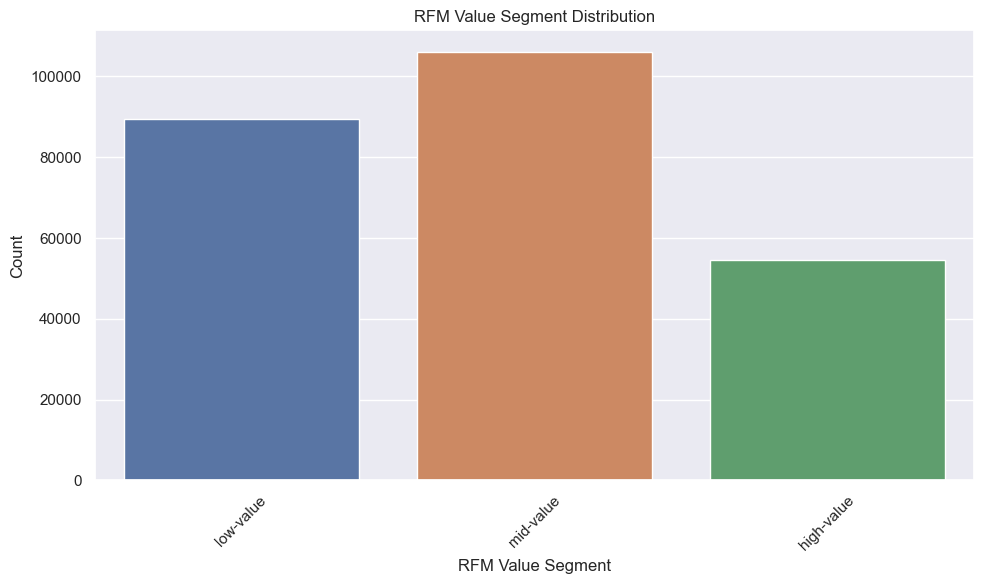

In [62]:
# To set the style for the plot 
sns.set(style="darkgrid")

# Create Barplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
barplot = sns.barplot(x='value_segment', y='count', data=segment_counts)

# Set plot labels and title
plt.xlabel('RFM Value Segment')
plt.ylabel('Count')
plt.title('RFM Value Segment Distribution')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the 
plt.tight_layout()
plt.show()

- RFM value segment represents the categorization of customers based on their RFM scores into groups such as “low value”, “medium value”, and “high value”.
- These segments are determined by dividing RFM scores into distinct ranges or groups, allowing for a more granular analysis of overall customer RFM characteristics.
- The RFM value segment helps us to understand the relative value of customers in terms of recency, frequency, and monetary aspects.

### Describe RFM Customer Segment 

- To provide a more strategic perspective on customer behaviour and characteristics in terms of recency, frequency, and monetary aspects. 
#### Classify RFM customer Segment as below :-
- 'Champions'customers  are particularly loyal, enthusiastic, or successful in their interactions with a product, service, or brand .
- 'Potential Loyal' customers are  "prospective loyal customer" indicates that the individual has the potential to become a loyal customer in the future based on their current behavior, interest, or engagement with a product or service.
- 'At risk customer' those who are in chance of switching to other product service and brand risk of losing such customer is high in terms of competition price quality
- 'Cant lose' customers are secured important customers to the business well engaged customer with product and brand.
- 'Lost' customers are those who are already stop using product ,service and brand.

In [63]:
# Create a new column for RFM Customer Segments
customer_final_data['rfm_customer_segments'] = ''

In [64]:
# Assign RFM segments based on the RFM score
customer_final_data.loc[(customer_final_data['rfm_score'] >= 9) & (customer_final_data['rfm_score'] < 13), 'rfm_customer_segments'] = 'Champions'
customer_final_data.loc[(customer_final_data['rfm_score'] >= 7) & (customer_final_data['rfm_score'] < 9), 'rfm_customer_segments'] = 'Loyal'
customer_final_data.loc[(customer_final_data['rfm_score'] >= 5) & (customer_final_data['rfm_score'] < 7), 'rfm_customer_segments'] = 'Speculative'
customer_final_data.loc[(customer_final_data['rfm_score'] >= 3) & (customer_final_data['rfm_score'] < 5), 'rfm_customer_segments'] = 'Churned'


In [65]:
customer_final_data.rfm_customer_segments.value_counts()

rfm_customer_segments
Champions      91573
Loyal          69093
Speculative    61985
Churned        27391
Name: count, dtype: int64

In [66]:
customer_final_data.columns

Index(['customer_id', 'country', 'description', 'stock_code',
       'transaction_count', 'product_count', 'recent_purchase_made',
       'avg_order_value', 'recency', 'frequency', 'monetary_value',
       'rec_score', 'freq_score', 'mone_score', 'rfm_score', 'value_segment',
       'rfm_customer_segments'],
      dtype='object')

## RFM Value Analysis
- Using Treemap to showcase value segment visualization low-value,mid-value nad high-value
- Heatmap visualization
- Plot rfm cusomter segments selecting one segment
- Coorelation matrix for championsegment of RFM values
- Plotly Plot comparison of RFM segments
- Comparison of RFM segment based on recency,freqency and monetory score

In [67]:
segment_product_counts = customer_final_data.groupby(['value_segment', 'rfm_customer_segments']).size().reset_index(name='count')
segment_product_counts.columns

Index(['value_segment', 'rfm_customer_segments', 'count'], dtype='object')

In [68]:
segment_product_counts.head()

value_segment rfm_customer_segments  count
0     low-value             Champions      0
1     low-value               Churned  27391
2     low-value                 Loyal      0
3     low-value           Speculative  61985
4     mid-value             Champions  37004

In [69]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install jupyterlab-plotly-extension

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement jupyterlab-plotly-extension (from versions: none)
ERROR: No matching distribution found for jupyterlab-plotly-extension


In [71]:
pip install plotly --upgrade

Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install plotly pandas jupyter

Note: you may need to restart the kernel to use updated packages.


In [73]:
pip install --upgrade plotly jupyter

Note: you may need to restart the kernel to use updated packages.


In [80]:
# Treemap plot using plotly function classifying customer segment as per value segments High value, Mid value & Low value
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

pio.templates.default = "plotly_white"
fig = px.treemap(segment_product_counts, path=['value_segment', 'rfm_customer_segments', 'count'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

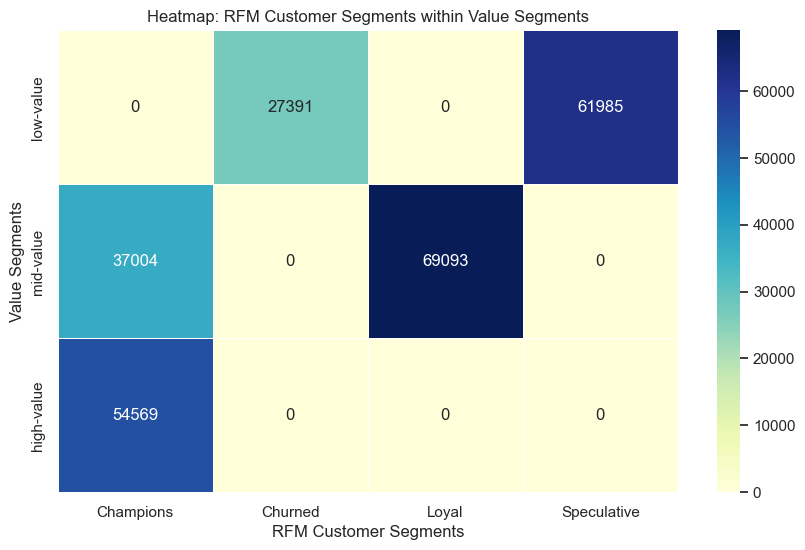

In [75]:
# Heatmap visualization customer segement within value segment High, Mid & Low value

pivot_table = segment_product_counts.pivot(index='value_segment', columns='rfm_customer_segments', values='count')

plt.figure(figsize=(10, 6))

# Create a heatmap using Seaborn
sns.heatmap(data=pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)

# Add title and labels
plt.title('Heatmap: RFM Customer Segments within Value Segments')
plt.xlabel('RFM Customer Segments')
plt.ylabel('Value Segments')

plt.show()


In [76]:
# Filter the data to include only the customers in the Champions segment
champions_segment = customer_final_data[customer_final_data['rfm_customer_segments'] == 'Champions']

fig = go.Figure()
fig.add_trace(go.Box(y=champions_segment['rec_score'], name='Recency'))
fig.add_trace(go.Box(y=champions_segment['freq_score'], name='Frequency'))
fig.add_trace(go.Box(y=champions_segment['mone_score'], name='Monetary'))

fig.update_layout(title='Distribution of RFM Values within Champions Segment',
                  yaxis_title='RFM Value',
                  showlegend=True)

fig.show()

In [77]:
correlation_matrix = champions_segment[['rec_score', 'freq_score', 'mone_score']].corr()

# Visualize the correlation matrix using a heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='RdBu',
                   colorbar=dict(title='Correlation')))

fig_heatmap.update_layout(title='Correlation Matrix of RFM Values within Champions Segment')

fig_heatmap.show()

In [78]:
# RFM customer segment comparison
import plotly.colors

pastel_colors = plotly.colors.qualitative.Pastel

segment_counts = customer_final_data['rfm_customer_segments'].value_counts()

# Create a bar chart to compare segment counts
fig = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values,
                            marker=dict(color=pastel_colors))])

# Set the color of the Champions segment as a different color
champions_color = 'rgb(158, 202, 225)'
fig.update_traces(marker_color=[champions_color if segment == 'Champions' else pastel_colors[i]
                                for i, segment in enumerate(segment_counts.index)],
                  marker_line_color='rgb(8, 48, 107)',
                  marker_line_width=1.5, opacity=0.6)

# Update the layout
fig.update_layout(title='Comparison of RFM Segments',
                  xaxis_title='RFM Segments',
                  yaxis_title='Number of Customers',
                  showlegend=False)

fig.show()

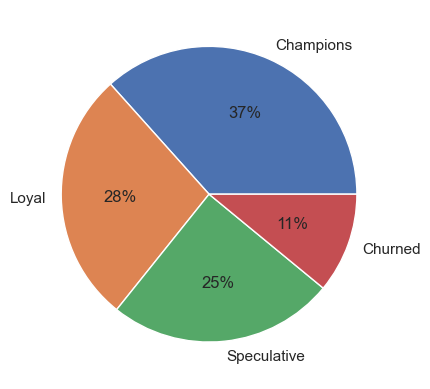

In [79]:
# Pie chart to check which segment has high % of customers
plt.pie(customer_final_data.rfm_customer_segments.value_counts(),
        labels=customer_final_data.rfm_customer_segments.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [81]:
# Calculate the average Recency, Frequency, and Monetary scores for each segment
segment_scores = customer_final_data.groupby('rfm_customer_segments')[['rec_score', 'freq_score', 'mone_score']].mean().reset_index()

# Create a grouped bar chart to compare segment scores
fig = go.Figure()

# Add bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['rfm_customer_segments'],
    y=segment_scores['rec_score'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))

# Add bars for Frequency score
fig.add_trace(go.Bar(
    x=segment_scores['rfm_customer_segments'],
    y=segment_scores['freq_score'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'
))

# Add bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['rfm_customer_segments'],
    y=segment_scores['mone_score'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'
))

# Update the layout
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True
)

fig.show()

Above visualization helps us to understand customer segmentation based on their buying bheaviour pattern when customer did recent purchase how oftenly and how much money they are spending buying one time or 2 times a month  which are  the three key attributes of RFM analysis which helps to under customer engagement ,loyalty and value to a business.

In [82]:
customer_final_data.columns

Index(['customer_id', 'country', 'description', 'stock_code',
       'transaction_count', 'product_count', 'recent_purchase_made',
       'avg_order_value', 'recency', 'frequency', 'monetary_value',
       'rec_score', 'freq_score', 'mone_score', 'rfm_score', 'value_segment',
       'rfm_customer_segments'],
      dtype='object')

In [83]:
# Used Agg() groupby function to create new dataframe to showcase delivery of segmentation based on value and customer segment and rfm score
segment_data = customer_final_data.groupby(['customer_id']).agg( value_segment=('value_segment', 'first'),rfm_customer_segments=('rfm_customer_segments', 'first'),rfm_score =('rfm_score','first')).reset_index()
segment_data

customer_id value_segment rfm_customer_segments  rfm_score
0         u12347     low-value           Speculative          6
1         u12348    high-value             Champions         11
2         u12349     mid-value             Champions          9
3          u1235     mid-value             Champions          9
4         u12352     mid-value                 Loyal          7
...          ...           ...                   ...        ...
4196       u1828     mid-value             Champions          9
4197      u18281    high-value             Champions         10
4198      u18282    high-value             Champions         12
4199      u18283     low-value           Speculative          6
4200      u18287     mid-value                 Loyal          8

[4201 rows x 4 columns]

## Loading data to local folder

In [84]:
segment_data.to_csv("../data/customer_segmentation_data.csv")

In [85]:
test=pd.read_csv("../data/customer_segmentation_data.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4201 entries, 0 to 4200
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             4201 non-null   int64 
 1   customer_id            4201 non-null   object
 2   value_segment          4201 non-null   object
 3   rfm_customer_segments  4201 non-null   object
 4   rfm_score              4201 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 164.2+ KB
